In [1]:
import numpy as np
import heapq
from collections import deque 

In [2]:
# Day 1
# Part A
calories = [0]
with open('day1.txt') as fid:
    for line in fid:
        if line[0] == '\n':
            calories.append(0)
            continue
        calories[-1] += int(line[:-1])
calories.sort()
print(calories[-1])
# Part B
print(sum(calories[-3:]))

69795
208437


In [3]:
# Day 2
# Part A
l, r = np.loadtxt('day2.txt', dtype=int, unpack=True,
                  converters={0:lambda s: {b'A':1, b'B':2, b'C':3}[s], 1:lambda s: {b'X':1, b'Y':2, b'Z':3}[s]})
print(sum((((r + 3 - l) % 3 + 1) % 3)*3 + r))
# Part B
print(sum((r - 1)*3 +  (l + r) % 3 + 1))


11767
13886


In [4]:
# Day 3
# Part A
with open('day3.txt') as fid:
    all_lines = fid.readlines()
priorities = 0
for line in all_lines:
    n = (len(line) - 1)//2
    common_letter = (set(line[:n]) & set(line[n:-1])).pop()
    priorities += ord(common_letter) - (96 if common_letter.islower() else 38)
print(priorities)
# Part B
priorities = 0
for j in range(len(all_lines)//3):
    common_letter = (set(all_lines[3*j + 0][:-1]) & set(all_lines[3*j + 1][:-1]) & set(all_lines[3*j + 2][:-1])).pop()
    priorities += ord(common_letter) - (96 if common_letter.islower() else 38)
print(priorities)
        

7824
2798


In [5]:
# Day 4
# Part A
with open('day4.txt') as fid:
    data = np.array([list(map(int, couple.split('-'))) for couple in fid.read().strip().replace(',','-').split('\n')], dtype=int)
print((((data[:,3] >= data[:,1]) & (data[:,2] <= data[:,0])) | ((data[:,3] <= data[:,1]) & (data[:,2] >= data[:,0]))).sum())
# Part B
print((np.maximum(data[:,0], data[:,2]) <= np.minimum(data[:,1], data[:,3])).sum())

602
891


In [6]:
# Day 5
# Part A
with open('day5.txt') as fid:
    stacks_ini_lines, movement = fid.read().split('\n\n')
stacks = ['']*10
for line in stacks_ini_lines.split('\n')[:-1]:
    for j in range(1, 10):
        stacks[j] += line[4*(j - 1) + 1]
stacks = [s.strip()[::-1] for s in stacks]

def get_top_crates_after_movement(stacks, movements, order=1):
    for line in movement.strip().split('\n'):
        tmp = line.split()
        n, fro, to = int(tmp[1]), int(tmp[3]), int(tmp[5])
        stacks[fro], crates_on_crane = stacks[fro][:-n], stacks[fro][-n:]
        stacks[to] += crates_on_crane[::order]
    return ''.join([stacks[j][-1] for j in range(1, 10)])

for order in [-1, 1]:
    print(get_top_crates_after_movement([s for s in stacks], movement.strip().split('\n'), order))

BSDMQFLSP
PGSQBFLDP


In [7]:
# Day 6
# Part A
with open('day6.txt') as fid:
    data = fid.read()
for i in range(4, len(data)):
    if len(set(data[i-4:i])) == 4:
        break
print(i)
# Part B
for i in range(14, len(data)):
    if len(set(data[i-14:i])) == 14:
        break
print(i)

1647
2447


In [8]:
# Day 6, fastest version: 642 µs vs 2.01 ms 
from collections import defaultdict
with open('day6.txt', 'rb') as f:
    data = f.read()
def index_of_unique_substring(occurences=1):
    n_unique = 0
    last_index_of_letter = defaultdict(lambda: -occurences)
    for i, c in enumerate(data):
        last_index, last_index_of_letter[c] = last_index_of_letter[c], i
        n_unique = n_unique + 1 if last_index < i - n_unique else i - last_index
        if n_unique == occurences:
            return i + 1
# Part A
print(index_of_unique_substring(4))
# Part B
print(index_of_unique_substring(14))

1647
2447


In [9]:
# Day 7
# Part A
with open('day7.txt') as fid:
    commands = fid.read().strip().split('\n')[::-1]
all_dir = []
path = []
while (commands):
    cmd = commands.pop()
    if cmd[:4] == '$ cd':
        name = cmd[5:]
        if name == '..':
            path.pop()
        elif name == '/':
            path.append('root')
        else:
            path.append(name)
    elif cmd[:4] == '$ ls':
        size_in_dir = 0
        while commands and commands[-1][0] != '$':
            cmd = commands.pop()        
            int_or_dir, name = cmd.split()
            if int_or_dir != 'dir':
                size_in_dir += int(int_or_dir)
        level = len(path) - 1
        while (level >= len(all_dir)):
            all_dir.append(defaultdict(int))
        all_dir[level]['/'.join(path)] = size_in_dir

for level in range(len(all_dir) - 1, 0, -1):
    for key, val in all_dir[level].items():
        parent = key[:key.rfind('/')]
        all_dir[level - 1][parent] += val

single_dict = {key:val for d in all_dir for key,val in d.items()}

print(sum([val for val in single_dict.values() if val <= 100000]))

# Part B
space_needed = 30000000 - (70000000 - single_dict['root'])
diff = single_dict['root'] - space_needed
for key, val in single_dict.items():
    newdiff = val - space_needed
    if newdiff > 0 and newdiff < diff:
        diff = newdiff
print(diff + space_needed)

1232307
7268994


In [10]:
# Day 8
# Part A
forrest = np.loadtxt('day8.txt', dtype=int, converters={0:lambda s: [int(c) - 48 for c in s]})
visible = np.zeros(forrest.shape, dtype=bool)
N = forrest.shape[0]
    
for jj in range(N):
    max_lft_rgt_top_bot = [-1, -1, -1, -1]
    for ii in range(N):
        for index_max, (j, i) in enumerate([(jj, ii), (jj, N - ii - 1), (ii, jj), (N - ii - 1, jj)]):
            if forrest[j, i] > max_lft_rgt_top_bot[index_max]:
                visible[j, i] = True
                max_lft_rgt_top_bot[index_max] = forrest[j, i]

print(visible.sum().sum())

# Part B
priority_queue = [(-(N-j-1)*j*(N-i-1)*i, i, j, 0) for i in range(1, N - 1) for j in range(1, N - 1)]
heapq.heapify(priority_queue)

pot, i, j, directions_tested = heapq.heappop(priority_queue)
count = 0
while True:
    count += 1
    #pot, i, j, directions_tested = heapq.heappop(priority_queue)
    if directions_tested == 0:
        for ii in range(i + 1, N):
            if forrest[j, ii] >= forrest[j, i]:
                break
        pot = (ii - i)*pot//(N - i - 1)
    elif directions_tested == 1:
        for ii in range(i - 1, -1, -1):
            if forrest[j, ii] >= forrest[j, i]:
                break
        pot = (i - ii)*pot//i
    elif directions_tested == 2:
        for jj in range(j + 1, N):
            if forrest[jj, i] >= forrest[j, i]:
                break
        pot = (jj - j)*pot//(N - j - 1)
    elif directions_tested == 3:
        for jj in range(j - 1, -1, -1):
            if forrest[jj, i] >= forrest[j, i]:
                break
        pot = (j - jj)*pot//j
    elif directions_tested == 4:
        # Done!
        #print(-pot, count, count/(4*(N-2)**2))
        print(-pot)
        break
#    print(directions_tested, i, j, pot, [a, b, c, d], a*b*c*d)
    directions_tested += 1
    pot, i, j, directions_tested = heapq.heappushpop(priority_queue, (pot, i, j, directions_tested))



1845
230112


In [11]:
# Day 9
# Part A
# 284 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
with open('day9.txt') as fid:
    data = fid.read().strip().split('\n')
posH = np.array([0, 0], dtype=int)
posT = np.array([0, 0], dtype=int)
visited = {tuple(posT)}
direction_map = {'R': np.array(( 1,  0), dtype=int), 
                 'L': np.array((-1,  0), dtype=int),
                 'U': np.array(( 0,  1), dtype=int),
                 'D': np.array(( 0, -1), dtype=int)}

def print_board(posH, posT, N=6):
    print('\n')
    for j in range(N - 2, -1, -1):
        s = ''
        for i in range(N):
            if posH[0] == i and posH[1] == j:
                s += 'H'
            elif posT[0] == i and posT[1] == j:
                s += 'T'
            else:
                s += '.'
        print(s)

def compute_Tadd(diff):
    if abs(diff[0]) > 1 or abs(diff[1]) > 1 :
        # move
        if diff[0] == 0 or diff[1] == 0:
            # Straight move:        
            Tadd = (diff//2)
        else:
            # Diagonal move
            Tadd = np.sign(diff)
    else:
        Tadd = np.array([0, 0], dtype=int)
    return Tadd

Taddcache = np.empty((5, 5, 2), dtype=int)
for i in range(-2, 3):
    for j in range(-2, 3):
        diff = np.array([i, j], dtype=int)
        Taddcache[i, j] = compute_Tadd(diff)

for move in data:
    direction, repeat = move.split()
    Hadd = direction_map[direction]
    for r in range(int(repeat)):
        posH += Hadd
        diff = posH - posT
        Tadd = Taddcache[diff[0], diff[1]]
        posT += Tadd
        visited.add(tuple(posT))
print(len(visited))

# Part B
robe = np.zeros((10, 2), dtype=int)
visited = {tuple(robe[9])}
for move in data:
    direction, repeat = move.split()
    Hadd = direction_map[direction]
    for r in range(int(repeat)):
        robe[0] += Hadd
        for j in range(9):
            diff = robe[j] - robe[j + 1]
            robe[j + 1] += Taddcache[diff[0], diff[1]]
        visited.add(tuple(robe[9]))
print(len(visited))

6284
2661


In [12]:
# Day 10
# Part A
with open('day10.txt') as fid:
    ops = fid.read().strip().split('\n')

x = 1
cycle = iters = result = 0
for op in ops:
    if op[0] == 'n':
        cycle += 1
    else:
        cycle += 2
    if cycle >= 20 + iters*40:
        result += x*(20 + iters*40)
        iters += 1
    if op[0] != 'n':
        x += int(op[5:])
print(result)
#Part B
x = 1
cycle = 0
display = []
for op in ops:
    if op[0] == 'n':
        n_cycles = 1        
    else:
        n_cycles = 2
    for j in range(n_cycles):
        hpos = cycle % 40
        if hpos + 1 == x or hpos == x or hpos - 1 == x:
            display.append('#')
        else:
            display.append('.')
        cycle += 1
    if op[0] != 'n':
        x += int(op[5:])
        
for j in range(6):
    print(''.join(display[j*40:((j + 1)*40)]))

#RZHFGJCB

13860
###..####.#..#.####..##....##..##..###..
#..#....#.#..#.#....#..#....#.#..#.#..#.
#..#...#..####.###..#.......#.#....###..
###...#...#..#.#....#.##....#.#....#..#.
#.#..#....#..#.#....#..#.#..#.#..#.#..#.
#..#.####.#..#.#.....###..##...##..###..


In [13]:
# Day 11
# Part A
from collections import namedtuple
import copy
MonkeyClass = namedtuple('monkey_class', ['id', 'items', 'operation1', 'operation2',
                                          'test_divisor',
                                         'true_throw', 'false_throw'])
def parse_monkey(monkey):
    mlines = monkey.split('\n')
    out = MonkeyClass(
        int(mlines[0][7]), 
        [int(w) for w in mlines[1][18:].strip().split(',')],
        eval(f'lambda old:({mlines[2][19:]})//3'),
        eval(f'lambda old:{mlines[2][19:]}'),
        int(mlines[3][21:]),
        int(mlines[4][29]),
        int(mlines[5][30]))
    return out

with open('day11.txt') as fid:
    ini_monkeys = [parse_monkey(m) for m in fid.read().strip().split('\n\n')]

monkeys = copy.deepcopy(ini_monkeys)
#print(monkeys)

inspections = [0]*len(monkeys)
for round in range(20):
    for monkey_index, monkey in enumerate(monkeys):
        for index in range(len(monkey.items)):
            monkey.items[index] = monkey.operation1(monkey.items[index])
            if monkey.items[index] % monkey.test_divisor == 0:
                monkeys[monkey.true_throw].items.append(monkey.items[index])
            else:
                monkeys[monkey.false_throw].items.append(monkey.items[index])
        inspections[monkey_index] += len(monkey.items)
        monkey.items.clear()

print(np.prod(sorted(inspections)[-2:]))

# Part B
monkeys = copy.deepcopy(ini_monkeys)

array = []
for monkey in monkeys:
    for index in range(len(monkey.items)):
        #array.append([monkey.items[index]])
        w = monkey.items[index]
        z_list = [w % m.test_divisor for m in monkeys]
        array.append(z_list)
        monkey.items[index] = len(array) - 1
        
        

inspections = [0]*len(monkeys)
for round in range(10000):
    for monkey_index, monkey in enumerate(monkeys):
        for index, item_index in enumerate(monkey.items):
            # Update item_index for each divisor
            for monkey_index_inner, monkey_inner in enumerate(monkeys):
                val = array[item_index][monkey_index_inner]
                array[item_index][monkey_index_inner] = monkey.operation2(val) % monkey_inner.test_divisor
            
            if array[item_index][monkey_index] == 0:
                monkeys[monkey.true_throw].items.append(monkey.items[index])
            else:
                monkeys[monkey.false_throw].items.append(monkey.items[index])

        inspections[monkey_index] += len(monkey.items)
        monkey.items.clear()
print(np.prod(sorted(inspections)[-2:]))

100345
28537348205


done in 206 steps
206 6995
[[204 203 202 ...  40  41  42]
 [205 204 203 ...  39  40  41]
 [206 205 204 ...  38  39  40]
 ...
 [  0   0   0 ...  38  39  40]
 [  0   0   0 ...  39  40  41]
 [  0   0   0 ...  40  41  42]]


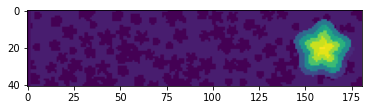

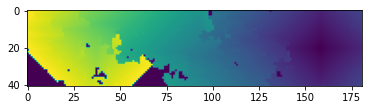

In [14]:
# Day 12 plots
with open('day12.txt') as fid:
    height = np.array([[ord(c) - ord('a') for c in line] for line in fid.read().strip().split('\n')], dtype=int)

idSj, idSi = np.where(height == ord('S') - ord('a'))
idSj, idSi = idSj[0], idSi[0]

idEj, idEi = np.where(height == ord('E') - ord('a'))
idEj, idEi = idEj[0], idEi[0]

height[idSj, idSi] = ord('a') - ord('a')
height[idEj, idEi] = ord('z') - ord('a')

priority_queue = []
heapq.heappush(priority_queue, (0, idEj, idEi))

visited = np.zeros(height.shape, dtype=bool)
visited[idEj, idEi] = True

distance_map = np.zeros(height.shape, dtype=int)

count = 0
while True:
    count += 1
    dist, j, i = heapq.heappop(priority_queue)
    #print(f'dist is {dist} at {j}, {i}')
    #print(iteration, dist, j, i)
    if j == idSj and i == idSi:
        print(f'done in {dist} steps')
        break
    for move in [(1,0), (0, 1), (-1, 0), (0, -1)]:
        jj, ii = j + move[0], i + move[1]
        if jj < 0 or ii < 0 or jj >= height.shape[0] or ii >= height.shape[1]:
            continue
        if visited[jj, ii]:
            continue
        if height[jj, ii] > height[j, i] + 1:
            continue
        # Acceptable move
        visited[jj, ii] = True
        distance_map[jj, ii] = dist + 1
        #print(f'push {dist + 1} at {jj}, {ii} to queue')
        heapq.heappush(priority_queue, (dist + 1, jj, ii))
print(dist, count)
import matplotlib.pyplot as plt
plt.imshow(height)
#plt.colorbar()
plt.figure()
plt.imshow(distance_map)
#plt.colorbar()
print(distance_map)

# Part B


In [15]:
# Day 12
# Part A
import heapq
with open('day12.txt') as fid:
    height = np.array([[ord(c) - ord('a') for c in line] for line in fid.read().strip().split('\n')], dtype=int)

idSj, idSi = np.where(height == ord('S') - ord('a'))
idSj, idSi = idSj[0], idSi[0]

idEj, idEi = np.where(height == ord('E') - ord('a'))
idEj, idEi = idEj[0], idEi[0]

height[idSj, idSi] = ord('a') - ord('a')
height[idEj, idEi] = ord('z') - ord('a')

priority_queue = []
heapq.heappush(priority_queue, (0, idEj, idEi))

visited = np.zeros(height.shape, dtype=bool)
visited[idEj, idEi] = True

dist_to_goals = {}
while True:
    dist, j, i = heapq.heappop(priority_queue)
    if j == idSj and i == idSi:
        dist_to_goals['partA'] = dist
        if len(dist_to_goals) == 2:
            break
    if height[j, i] == 0 and 'partB' not in dist_to_goals:
        dist_to_goals['partB'] = dist
        if len(dist_to_goals) == 2:
            break

    for move in [(1,0), (0, 1), (-1, 0), (0, -1)]:
        jj, ii = j + move[0], i + move[1]
        if jj < 0 or ii < 0 or jj >= height.shape[0] or ii >= height.shape[1]:
            continue
        if visited[jj, ii]:
            continue
        if height[jj, ii] < height[j, i] - 1:
            continue
        # Acceptable move
        visited[jj, ii] = True
        heapq.heappush(priority_queue, (dist + 1, jj, ii))

print(dist_to_goals['partA'])
# Part B:
print(dist_to_goals['partB'])


528
522
